# Multi-Agent Reinforcement Learning: Cournot Competition

This notebook demonstrates training neural network policies for agents in a Cournot oligopoly market.

## Setup

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from environment import CournotEnvironment
from policy import (
    PolicyNetwork_asymmetrical,
    PolicyNetwork_Nash
)
from trainer import CournotTrainer
from utils import (
    plot_training_convergence,
    plot_policy_response,
    plot_exploration_schedule,
    plot_action_distribution,
    plot_profit_analysis,
    compare_agents,
    print_evaluation_summary
)

# Matplotlib settings
plt.style.use('seaborn-v0_8-darkgrid')
%matplotlib inline

In [2]:
# Set random seed for reproducibility
np.random.seed(42)

## 1. Cournot Reinforcement Learning with Perfect Information

As a baseline and proof that our model works, we first train an agent on a Cournot competition with perfect information to show that our Reinforcement Learning model works (meaning it reach Nash Equilibrium when all assumptions are met).

In [3]:
# Create environment (SAME as above)
env_config = {
    "a_min": 80.0,
    "a_max": 120.0,
    "b_min": 0.8,
    "b_max": 1.2,
    "cost_min": 5.0,
    "cost_max": 50.0,
    "q_max": 100.0,
    "seed": 42
}
env = CournotEnvironment(env_config)

# Create policies - learning agent + opponent (4D input - KEY DIFFERENCE!)
learning_agent = PolicyNetwork_Nash(input_dim=4, hidden_dim=64)
opponent_agent = PolicyNetwork_Nash(input_dim=4, hidden_dim=64)
policies = [learning_agent, opponent_agent]

# Training configuration (SAME as above)
config = {
    'episodes': 100000,
    'lr_init': 0.003,
    'lr_final': 0.0001,
    'warmup_steps': 10000,
    'sigma_init': 12.0,
    'sigma_final': 3.0,
    'sigma_decay': 0.99996,
    'print_interval': 10000,
    
    # Self-play settings
    'opponent_update_interval': 1000,
    'learning_agent_id': 0
}

# Create trainer (SAME as above)
trainer = CournotTrainer(n_players=2, env=env, policies=policies, config=config)

# Train (SAME as above)
history = trainer.train(verbose=True)
nash_agent = learning_agent

Training 2 agents for 100000 episodes (self-play mode)
  Learning signal: regret minimization (normalized)
  Agent 0: PolicyNetwork_Nash - Nash (full info)
  Agent 1: PolicyNetwork_Nash - Nash (full info)
  Learning agent: 0
  Opponent update interval: 1000
Episode 0/100000 | Avg Regret EMA: 0.0000
Episode 10000/100000 | Avg Regret EMA: 94.3404
Episode 20000/100000 | Avg Regret EMA: 35.8535
Episode 30000/100000 | Avg Regret EMA: 20.2552
Episode 40000/100000 | Avg Regret EMA: 13.3451
Episode 50000/100000 | Avg Regret EMA: 13.5206
Episode 60000/100000 | Avg Regret EMA: 12.8500
Episode 70000/100000 | Avg Regret EMA: 12.1299
Episode 80000/100000 | Avg Regret EMA: 11.6186
Episode 90000/100000 | Avg Regret EMA: 9.8260
Training complete!
  Final average regret (EMA): 12.1546
  Final average regret (cumulative/T): 41.5644
  Total opponent updates: 99


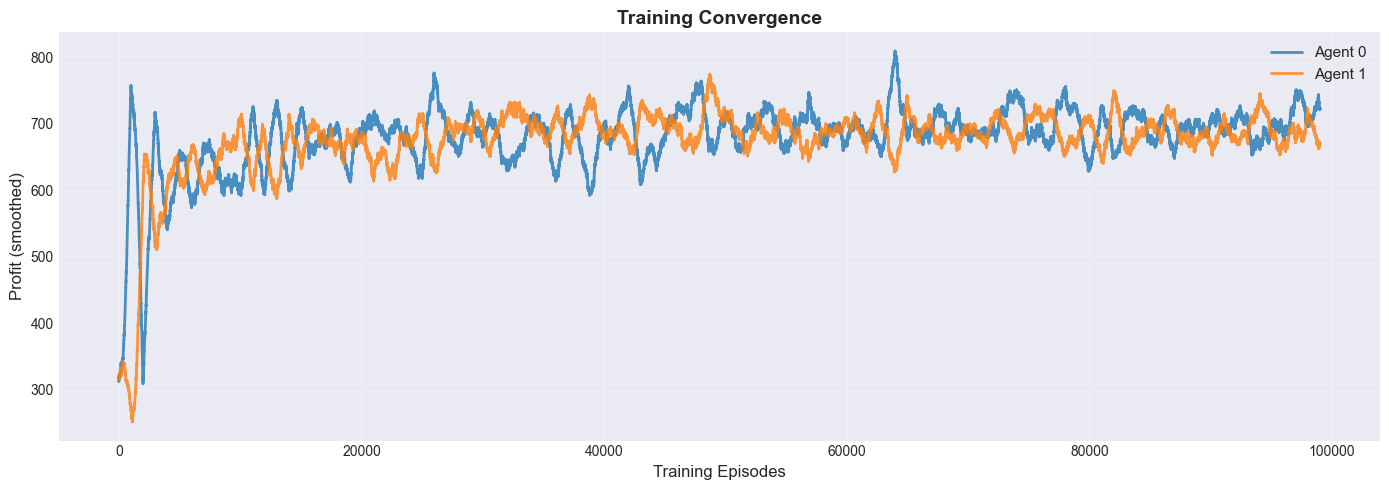

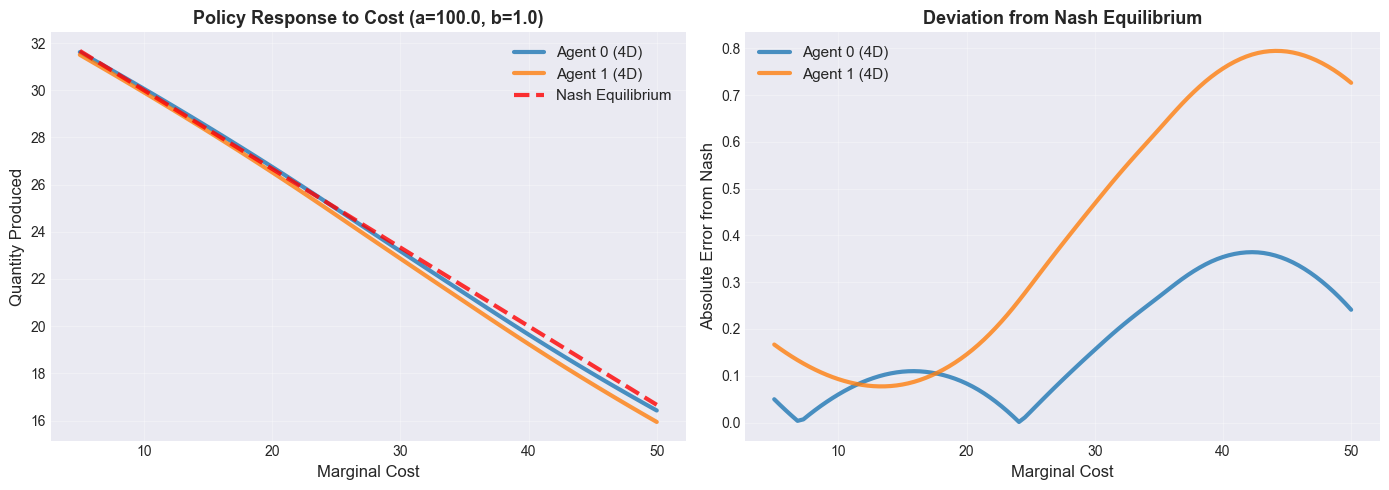

In [4]:
# Plot training convergence
fig = plot_training_convergence(history, window=1000, figsize=(14, 5))
plt.show()

# Plot how policies respond to different costs
fig = plot_policy_response(policies, env, a_fixed=100.0, b_fixed=1.0, figsize=(14, 5))
plt.show()

We can see that the agent follows closely the Nash equilibrium when it has perfect information.

## 2. Cournot Reinforcement Learning with Partial Information

Here we intend to use the same model, but we remove some knowledge to the agent to be get closer to real market conditions. That means that here, the agent uses the same process to learn but it doesn't know the the other firm's marginal cost but it still knows the demand's parameters

In [ ]:
# Create environment (SAME as above)
env_config = {
    "a_min": 80.0,
    "a_max": 120.0,
    "b_min": 0.8,
    "b_max": 1.2,
    "cost_min": 5.0,
    "cost_max": 50.0,
    "q_max": 100.0,
    "seed": 42
}
env = CournotEnvironment(env_config)

# Create policies - learning agent + opponent (4D input - KEY DIFFERENCE!)
learning_agent = PolicyNetwork_asymmetrical(input_dim=3, hidden_dim=64)
opponent_agent = PolicyNetwork_asymmetrical(input_dim=3, hidden_dim=64)
policies = [learning_agent, opponent_agent]

# Training configuration (SAME as above)
config = {
    'episodes': 100000,  # ← Much longer!
    'lr_init': 0.005,    # ← Higher LR
    'lr_final': 0.0001,
    'warmup_steps': 15000,
    'sigma_init': 15.0,
    'sigma_final': 3.0,
    'sigma_decay': 0.99998,
    'print_interval': 10000
}

# Create trainer (SAME as above)
trainer = CournotTrainer(n_players=2, env=env, policies=policies, config=config)

# Train (SAME as above)
history = trainer.train(verbose=True)
partial_agent = learning_agent

Training 2 agents for 100000 episodes (simultaneous mode)
  Learning signal: regret minimization (normalized)
  Agent 0: PolicyNetwork_asymmetrical - Asymmetric (demand + cost)
  Agent 1: PolicyNetwork_asymmetrical - Asymmetric (demand + cost)
Episode 0/100000 | Avg Regret EMA: 0.0000
Episode 10000/100000 | Avg Regret EMA: 218.8641
Episode 20000/100000 | Avg Regret EMA: 118.6402
Episode 30000/100000 | Avg Regret EMA: 98.4627
Episode 40000/100000 | Avg Regret EMA: 79.3478
Episode 50000/100000 | Avg Regret EMA: 47.9891
Episode 60000/100000 | Avg Regret EMA: 38.3172
Episode 70000/100000 | Avg Regret EMA: 28.6677
Episode 80000/100000 | Avg Regret EMA: 19.4380
Episode 90000/100000 | Avg Regret EMA: 23.5390
Training complete!
  Final average regret (EMA): 20.7544
  Final average regret (cumulative/T): 91.9490


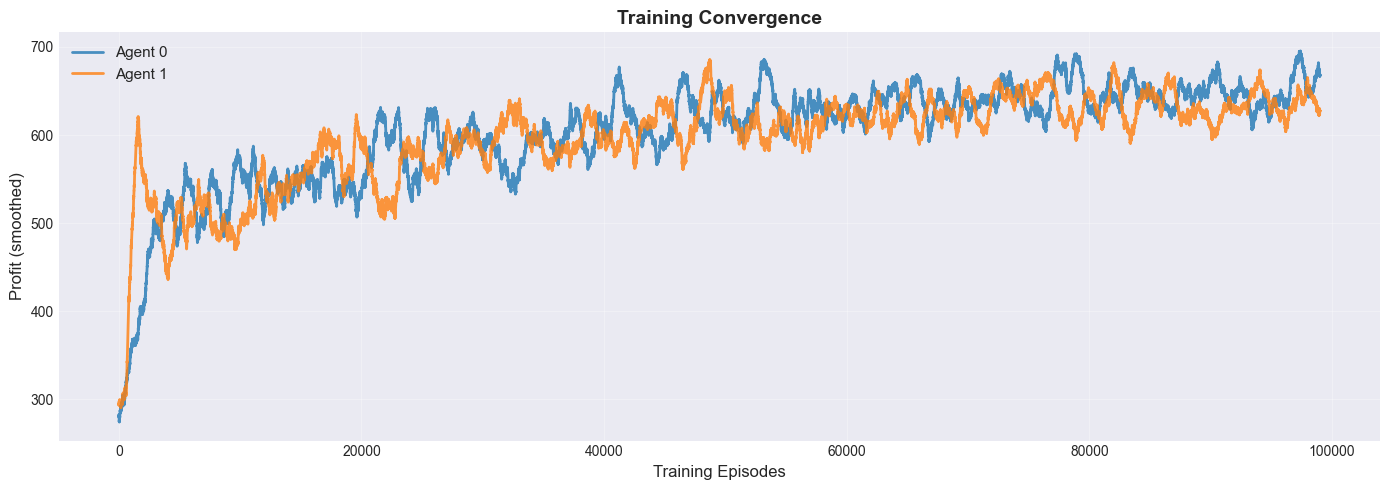

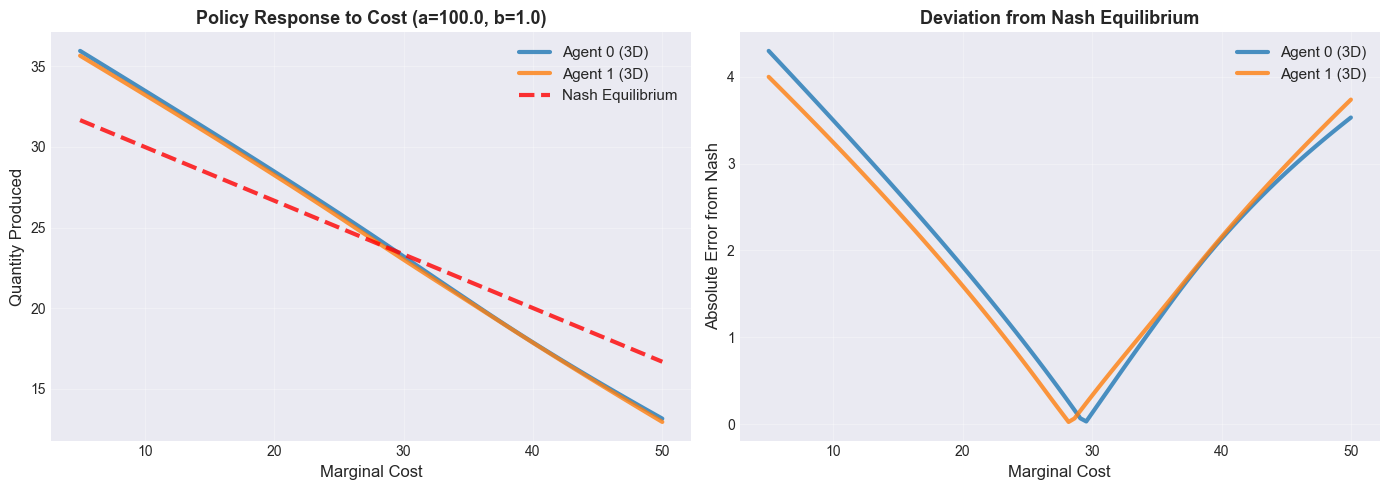

In [16]:
# Plot training convergence
fig = plot_training_convergence(history, window=1000, figsize=(14, 5))
plt.show()

# Plot how policies respond to different costs
fig = plot_policy_response(policies, env, a_fixed=100.0, b_fixed=1.0, figsize=(14, 5))
plt.show()

## 3. Cournot Reinforcement Learning with Asymmetric Information

Again, we remove some informations for our agent as here it doesn't know about demand's parameters and other firm's cost.

In [18]:
# Create environment (SAME as above)
env_config = {
    "a_min": 80.0,
    "a_max": 120.0,
    "b_min": 0.8,
    "b_max": 1.2,
    "cost_min": 5.0,
    "cost_max": 50.0,
    "q_max": 100.0,
    "seed": 42
}
env = CournotEnvironment(env_config)

# Create policies - learning agent + opponent (4D input - KEY DIFFERENCE!)
learning_agent = PolicyNetwork_asymmetrical(input_dim=1, hidden_dim=64)
opponent_agent = PolicyNetwork_asymmetrical(input_dim=1, hidden_dim=64)
policies = [learning_agent, opponent_agent]

# Training configuration (SAME as above)
config = {
    'episodes': 100000,  # ← Much longer!
    'lr_init': 0.005,    # ← Higher LR
    'lr_final': 0.0001,
    'warmup_steps': 15000,
    'sigma_init': 15.0,
    'sigma_final': 3.0,
    'sigma_decay': 0.99998,
    'print_interval': 10000
}

# Create trainer (SAME as above)
trainer = CournotTrainer(n_players=2, env=env, policies=policies, config=config)

# Train (SAME as above)
history = trainer.train(verbose=True)
asymmetric_agent  = learning_agent

Training 2 agents for 100000 episodes (simultaneous mode)
  Learning signal: regret minimization (normalized)
  Agent 0: PolicyNetwork_asymmetrical - Minimal (cost only)
  Agent 1: PolicyNetwork_asymmetrical - Minimal (cost only)
Episode 0/100000 | Avg Regret EMA: 0.0000
Episode 10000/100000 | Avg Regret EMA: 246.3884
Episode 20000/100000 | Avg Regret EMA: 162.7155
Episode 30000/100000 | Avg Regret EMA: 143.6540
Episode 40000/100000 | Avg Regret EMA: 106.0057
Episode 50000/100000 | Avg Regret EMA: 101.0581
Episode 60000/100000 | Avg Regret EMA: 79.5132
Episode 70000/100000 | Avg Regret EMA: 87.3919
Episode 80000/100000 | Avg Regret EMA: 76.2255
Episode 90000/100000 | Avg Regret EMA: 67.6511
Training complete!
  Final average regret (EMA): 68.0010
  Final average regret (cumulative/T): 130.3856


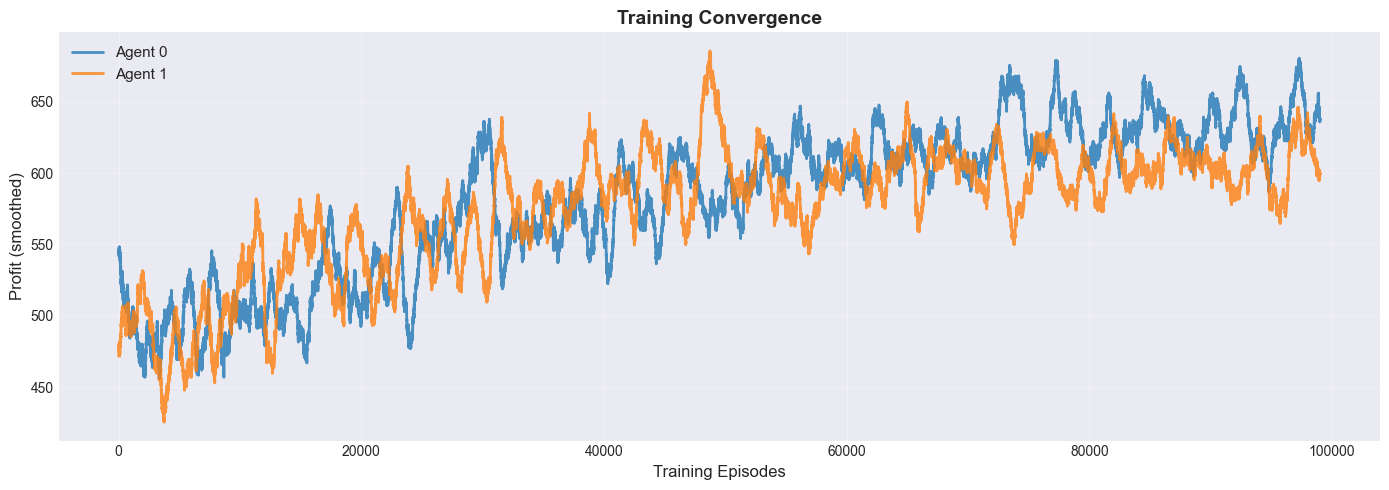

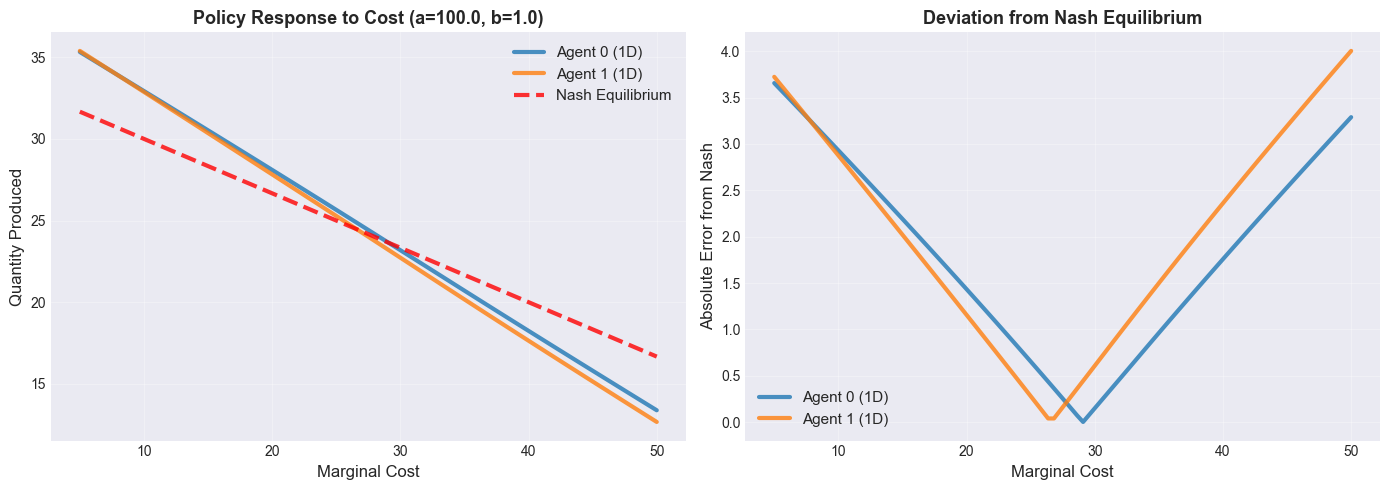

In [19]:
# Plot training convergence
fig = plot_training_convergence(history, window=1000, figsize=(14, 5))
plt.show()

# Plot how policies respond to different costs
fig = plot_policy_response(policies, env, a_fixed=100.0, b_fixed=1.0, figsize=(14, 5))
plt.show()

## 4. Save the trained agents

In [ ]:
import torch

torch.save(nash_agent, "agent_perfect_info.pt")
torch.save(nash_agent, "agent_partial_info.pt")
torch.save(asymmetric_agent, "agent_asymmetric_info.pt")

## 4. Testing
We are gonna extract the two agents: one that has learned with perfect information and one that has learned with asymmetric information. Then we will make them play against each other in a static cournot competition.
The first agent keep his perfect information meaning it will know the demand parameters and the other firm's marginal cost.

In [12]:
test_env_config = {
    "a_min": 90.0,
    "a_max": 90.0,
    "b_min": 1.1,
    "b_max": 1.1,
    "cost_min": 10.0,
    "cost_max": 10.0,
    "q_max": 100.0,
    "seed": 123
}

test_env = CournotEnvironment(test_env_config)

# Load agents directly
perfect_info_agent = torch.load("agent_perfect_info.pt")
asymmetric_info_agent = torch.load("agent_asymmetric_info.pt")

test_policies = [
    perfect_info_agent,
    asymmetric_info_agent
]

C:\Users\scheu\AppData\Local\Temp\ipykernel_29912\1587357053.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  perfect_info_agent = torch.load("agent_perfect_info.pt")
C:

In [13]:
def evaluate_agents(env, policies, n_episodes=5000):
    profits = np.zeros((n_episodes, len(policies)))
    quantities = np.zeros((n_episodes, len(policies)))

    for ep in range(n_episodes):
        # Sample new market each episode
        a, b, costs = env.sample_scenario(n_players=len(policies))

        actions = np.zeros(len(policies))
        for i, policy in enumerate(policies):
            state = np.array([a, b, costs[i]]) \
                if policy.input_dim == 3 else np.array([a, b, costs[i], costs[1 - i]])

            actions[i] = policy.forward(state)

        actions = np.clip(actions, 0.0, env.config["q_max"])
        rewards = env.profit(actions, costs, a, b)

        profits[ep] = rewards
        quantities[ep] = actions

    return profits, quantities


In [14]:
profits, quantities = evaluate_agents(test_env, test_policies)

print("Average profits:")
print("Perfect info agent:", profits[:, 0].mean())
print("Asymmetric info agent:", profits[:, 1].mean())

print("Average quantities:")
print("Perfect info agent:", quantities[:, 0].mean())
print("Asymmetric info agent:", quantities[:, 1].mean())

ValueError: Expected state of dimension 1, got 4

In [ ]:
test_env_config = {
    "a_min": 90.0,
    "a_max": 90.0,
    "b_min": 1.1,
    "b_max": 1.1,
    "cost_min": 10.0,
    "cost_max": 10.0,
    "q_max": 100.0,
    "seed": 123
}

test_env = CournotEnvironment(test_env_config)

# Load agents directly
perfect_info_agent = torch.load("agent_perfect_info.pt")
asymmetric_info_agent = torch.load("agent_asymmetric_info.pt")

test_policies = [
    asymmetric_info_agent,
    asymmetric_info_agent
]

C:\Users\scheu\AppData\Local\Temp\ipykernel_11148\1154878903.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  perfect_info_agent = torch.load("agent_perfect_info.pt")
C:

In [ ]:
def evaluate_agents(env, policies, n_episodes=5000):
    profits = np.zeros((n_episodes, len(policies)))
    quantities = np.zeros((n_episodes, len(policies)))

    for ep in range(n_episodes):
        # Sample new market each episode
        a, b, costs = env.sample_scenario(n_players=len(policies))

        actions = np.zeros(len(policies))
        for i, policy in enumerate(policies):
            state = np.array([a, b, costs[i]]) \
                if policy.input_dim == 3 else np.array([a, b, costs[i], costs[1 - i]])

            actions[i] = policy.forward(state)

        actions = np.clip(actions, 0.0, env.config["q_max"])
        rewards = env.profit(actions, costs, a, b)

        profits[ep] = rewards
        quantities[ep] = actions

    return profits, quantities

In [ ]:
profits, quantities = evaluate_agents(test_env, test_policies)

print("Average profits:")
print("Agent 1:", profits[:, 0].mean())
print("Agent 2:", profits[:, 1].mean())

print("Average quantities:")
print("Agent 1:", quantities[:, 0].mean())
print("Agent 2:", quantities[:, 1].mean())

Average profits:
Agent 1: 530.052010859378
Agent 2: 530.052010859378
Average quantities:
Agent 1: 27.649963733502833
Agent 2: 27.649963733502833


In [ ]:
test_env_config = {
    "a_min": 90.0,
    "a_max": 90.0,
    "b_min": 1.1,
    "b_max": 1.1,
    "cost_min": 10.0,
    "cost_max": 10.0,
    "q_max": 100.0,
    "seed": 123
}

test_env = CournotEnvironment(test_env_config)

# Load agents directly
perfect_info_agent = torch.load("agent_perfect_info.pt")
asymmetric_info_agent = torch.load("agent_asymmetric_info.pt")

test_policies = [
    perfect_info_agent,
    perfect_info_agent
]

def evaluate_agents(env, policies, n_episodes=5000):
    profits = np.zeros((n_episodes, len(policies)))
    quantities = np.zeros((n_episodes, len(policies)))

    for ep in range(n_episodes):
        # Sample new market each episode
        a, b, costs = env.sample_scenario(n_players=len(policies))

        actions = np.zeros(len(policies))
        for i, policy in enumerate(policies):
            state = np.array([a, b, costs[i]]) \
                if policy.input_dim == 3 else np.array([a, b, costs[i], costs[1 - i]])

            actions[i] = policy.forward(state)

        actions = np.clip(actions, 0.0, env.config["q_max"])
        rewards = env.profit(actions, costs, a, b)

        profits[ep] = rewards
        quantities[ep] = actions

    return profits, quantities

profits, quantities = evaluate_agents(test_env, test_policies)

print("Average profits:")
print("Agent 1:", profits[:, 0].mean())
print("Agent 2:", profits[:, 1].mean())

print("Average quantities:")
print("Agent 1:", quantities[:, 0].mean())
print("Agent 2:", quantities[:, 1].mean())

C:\Users\scheu\AppData\Local\Temp\ipykernel_11148\689398534.py:15: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  perfect_info_agent = torch.load("agent_perfect_info.pt")
C:\

Average profits:
Agent 1: 656.1492169564315
Agent 2: 656.1492169564315
Average quantities:
Agent 1: 23.867666256256065
Agent 2: 23.867666256256065


In [ ]:
from policy import PolicyNetwork_Nash, PolicyNetwork_asymmetrical
from mixed_policy import MixedPolicyAdapter
from mixed_trainer import MixedCournotTrainer

# environment
env = CournotEnvironment(env_config)

# policies
nash = PolicyNetwork_Nash(input_dim=4, hidden_dim=64)
asym = PolicyNetwork_asymmetrical(input_dim=3, hidden_dim=64)

policies = [
    MixedPolicyAdapter(nash, agent_id=0),
    MixedPolicyAdapter(asym, agent_id=1),
]

# symmetric mixed-information trainer
trainer = MixedCournotTrainer(
    n_players=2,
    env=env,
    policies=policies,
    config=config
)

# train
history = trainer.train(verbose=True)

Training 2 agents (symmetric mixed-information learning)
  Learning signal: regret minimization (normalized)
Episode 0/100000 | Avg Regret EMA: 0.0000
Episode 10000/100000 | Avg Regret EMA: 70.2561
Episode 20000/100000 | Avg Regret EMA: 46.3840
Episode 30000/100000 | Avg Regret EMA: 24.9176
Episode 40000/100000 | Avg Regret EMA: 19.7930
Episode 50000/100000 | Avg Regret EMA: 18.2308
Episode 60000/100000 | Avg Regret EMA: 18.2770
Episode 70000/100000 | Avg Regret EMA: 15.7868
Episode 80000/100000 | Avg Regret EMA: 16.9032
Episode 90000/100000 | Avg Regret EMA: 16.2881
Training complete!
  Final average regret (EMA): 18.3547
  Final average regret (cumulative/T): 46.1476


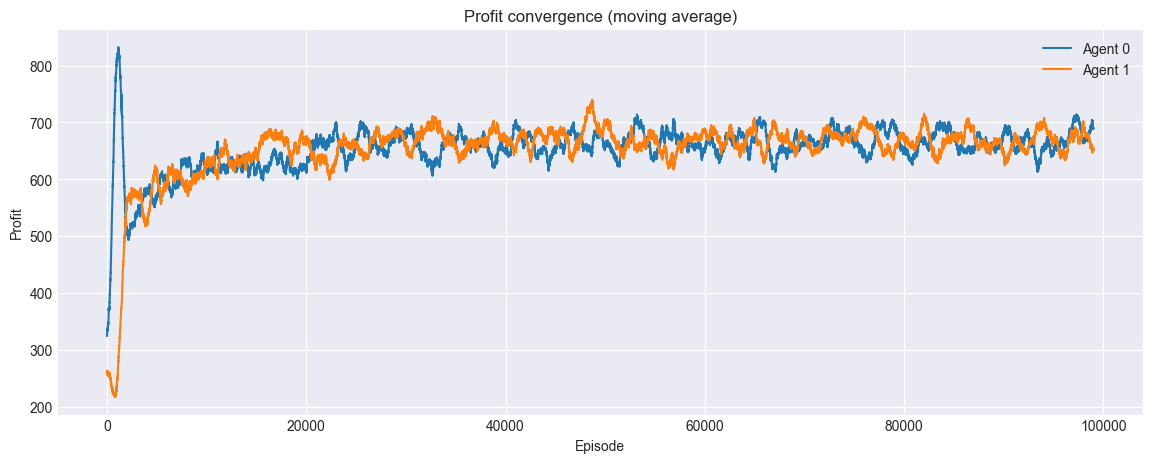

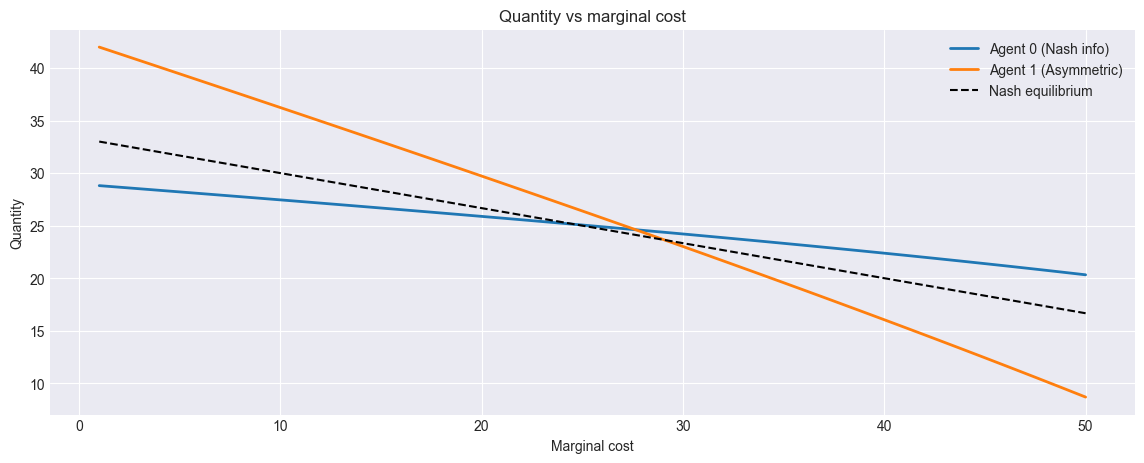

In [ ]:
def plot_profit_convergence(history, window=1000, figsize=(14, 5)):
    rewards = history["rewards"]  # shape: (T, n_players)

    def moving_avg(x, w):
        return np.convolve(x, np.ones(w) / w, mode="valid")

    fig, ax = plt.subplots(figsize=figsize)

    for i in range(rewards.shape[1]):
        ax.plot(
            moving_avg(rewards[:, i], window),
            label=f"Agent {i}"
        )

    ax.set_title("Profit convergence (moving average)")
    ax.set_xlabel("Episode")
    ax.set_ylabel("Profit")
    ax.legend()
    ax.grid(True)

    return fig

def plot_quantity_vs_cost(
    policies,
    env,
    a_fixed=100.0,
    b_fixed=1.0,
    cost_grid=None,
    figsize=(14, 5)
):
    if cost_grid is None:
        cost_grid = np.linspace(1.0, 50.0, 40)

    q_policy = np.zeros((len(policies), len(cost_grid)))
    q_nash = np.zeros((2, len(cost_grid)))

    for k, c in enumerate(cost_grid):
        costs = np.array([c, c])

        # Learned policies
        for i, policy in enumerate(policies):
            full_state = np.array([a_fixed, b_fixed, costs[i], costs[1 - i]])
            q_policy[i, k] = min(
                policy.forward(full_state),
                env.config["q_max"]
            )

        # True Nash equilibrium
        q_nash[:, k] = env.nash_equilibrium(a_fixed, b_fixed, costs)

    fig, ax = plt.subplots(figsize=figsize)

    ax.plot(cost_grid, q_policy[0], label="Agent 0 (Nash info)", linewidth=2)
    ax.plot(cost_grid, q_policy[1], label="Agent 1 (Asymmetric)", linewidth=2)
    ax.plot(cost_grid, q_nash[0], "--", label="Nash equilibrium", color="black")

    ax.set_title("Quantity vs marginal cost")
    ax.set_xlabel("Marginal cost")
    ax.set_ylabel("Quantity")
    ax.legend()
    ax.grid(True)

    return fig

fig = plot_profit_convergence(history, window=1000)
plt.show()


fig = plot_quantity_vs_cost(
    policies,
    env,
    a_fixed=100.0,
    b_fixed=1.0
)
plt.show()


In [ ]:
sigma = 0.0

a = 90.0
b = 1.1
costs = np.array([10.0, 10.0])

# Trainer-style states: [a, b, c_i, c_j]
state_0 = np.array([a, b, costs[0], costs[1]])
state_1 = np.array([a, b, costs[1], costs[0]])

# Call the ADAPTER, not the raw policy
q0 = policies[0].forward(state_0)
q1 = policies[1].forward(state_1)

actions = np.array([q0, q1])

profits = test_env.profit(actions, costs, a=a, b=b)

print(f"Nash agent quantity: {actions[0]:.4f}")
print(f"Asymmetric agent quantity: {actions[1]:.4f}")

print(f"Nash agent profit: {profits[0]:.4f}")
print(f"Asymmetric agent profit: {profits[1]:.4f}")


Nash agent quantity: 16.2672
Asymmetric agent quantity: 4.5645
Nash agent profit: 277.9267
Asymmetric agent profit: 77.9853
